<p align="center">
    <img src="../../img/ods_stickers.jpg">
</p>

## <center>Открытый курс по машинному обучению</center>

<center>
    Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий
</center>

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
df = pd.read_csv('../../data/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
(df[df['sex'] == 'Female']['age']).mean()

36.858230433571627

**3. Какова доля граждан Германии (признак *native-country*)?**

In [5]:
df['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

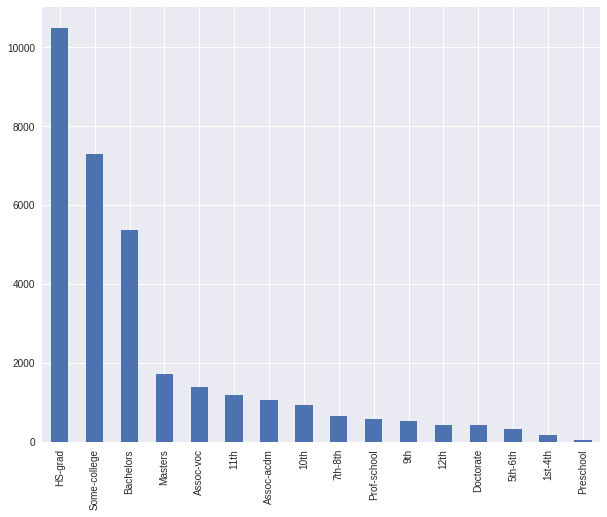

In [6]:
df['education'].value_counts().plot(kind='bar')

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [7]:
df.groupby('salary')['age'].agg(['mean', 'std'])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [8]:
df[df['salary'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [9]:
df.groupby(['race', 'sex']).describe().loc['Amer-Indian-Eskimo', 'Male']['age'].loc['max']

82.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [10]:
married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

pd.crosstab(df['marital-status'].isin(married), df['salary'], normalize=True)['>50K']

marital-status
False    0.033936
True     0.206873
Name: >50K, dtype: float64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [11]:
# max number of hours per week
df['hours-per-week'].max()

99

In [12]:
# number of people working that n of hours
len(df[df['hours-per-week'] == df['hours-per-week'].max()])

85

In [13]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [14]:
df.groupby(['salary', 'native-country'])['hours-per-week'].mean()

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     